# Project


Your final project encompasses all major aspects of the course and of text-mining projects you will encounter after school. You will begin by acquiring data yourself. By module six you are asked to have that data cleaned, tokenized, normalized, and you will calculate descriptive statistics on your corpus. You are expected to acquire your data via an API or via web scraping. 

You should find a data set that is grouped or that can be classified via topic modeling. The steps of your final project will vary depending on whether or not your data are grouped.

If your data is grouped, then you will begin by building a classification model and reporting the accuracy of your model against a hold-out test set. Then you will ignore the groups and build a topic model such as NMF, LSA, or LDA to put the data into groups. You will then compare how well those topics agree with the a priori groups. 

If your data is not grouped, then your steps are reversed. You will begin by building a topic model. You will adjust that model as necessary until you feel satisfied with the topics discovered. Subset your data to the topics you feel most comfortable with, and use that resulting data set to build a classification model. Once again, report the accuracy of your classification model against a hold-out test set. 

Final projects and datasets from prior courses cannot be used. It is required that you and your team use GitHub as a code hosting platform to manage version control and collaboration during this project. It is also necessary to create and add a README file to your GitHub repository.
Project Timeline:

    Module 1 (by the end of Week 1): You signed up for your Final Team Project group in Blackboard. Each team has two or three members.
    Module 4 (by the end of Week 4): Each team selected and introduced a dataset. The team representative submitted the "Team Project Status Update Form" in Assignment 4.2.
    Module 6 (by the end of Week 6): Each team submitted descriptive statistics on your clean, tokenized, and normalized data in Assignment 6.2.
    Module 7 (by the end of Week 7): Each team will submit the following deliverables for the course project in the final week. The final project has two options for submission detailed below. 

Final Team Project Options:
Option 1: Presentations
If your team chooses this option, you must submit the deliverables outlined below.

    Videos: Two videos, one under 20 minutes and one with six or fewer slides. These videos should be done by all team members.
        Video 1: Technical (peer data scientists) - This video should be a detailed technical presentation of what you have done. The recording of this presentation should be shorter than 20 minutes, but the format is up to you. Someone viewing your presentation should know all of the work you have done and the results of your analysis. Your imagined audience for this presentation should be other data scientists. Do not assume they are fully conversant with the topics of this course, but you can assume familiarity with concepts in statistics, machine learning, and analytics.
        Video 2: Non-Technical (Business Executive) - This presentation should be short (5 or 6 slides) and does not need extensive introduction or conclusions. This presentation is the sort that you would share with colleagues for incorporation into a larger presentation for something like a Quarterly Business Review for a non-technical audience. Include one or two slides on both your classification and your topic models, as well as a discussion of potential applications or next steps.
    Technical Notebook: One PDF document of your technical notebook containing your project code with thorough code notation and explanations of approach, code output, interpretation of your code output, and actionable insight recommendations and recommended next steps.
    GitHub Repository: Containing your project technical notebook(s) that demonstrates team collaboration. In your final technical notebook submitted on Blackboard, include a link to your GitHub repository.
    Presentation (PowerPoint/Others): Submit your slide presentations for both presentations.

Option 2: Application
If your team chooses this option, you must submit the deliverables outlined below.

    Application: Your second option is to produce an application, using Flask, that implements your classification model. Your application should allow users to drop in text and have it classified. If possible, include additional information such as the specific words that are most responsible for determining the classification. Include a tab that provides an overview of your topic model, but that portion of the application need not be interactive.
    GitHub Repository: Containing your project technical notebook(s) that demonstrates team collaboration. In your final technical notebook submitted on Blackboard, include a link to your GitHub repository.
    Video: In addition to submitting the link to the application, record an introductory screen share. This screen share should provide an overview of your application and illustrate its use. This screen share should be shorter than 10 minutes.
    Technical Notebook: One PDF document of your technical notebook containing your project code with thorough code notation and explanations of approach, code output, interpretation of your code output, and actionable insight recommendations and recommended next steps.

It is critical to note that no extensions will be given for any of the final projects due dates for any reason, and final projects submitted after the final due date will not be graded.
Project Datasets:
You will be responsible for gathering the data set for this project either from an API or via Web Scraping. Both of those approaches can be rate limited, so make sure to give yourself enough time to assemble the data. Include your data pulling notebook or notebooks in your repository.
Requirements:
Divide the work equally between the team members and ensure that everyone writes to code. You are expected to write high-quality, efficient, and readable code in Python. Regardless of the option you choose you should submit your repository that includes all code used in the project and a README

    Include a link to your repository in your submission.

Option 1 (Presentations) Requirements:

    Give a 15-20 minute technical presentation covering your project.
        The clearly defined problem statement and data description
        Tokenization and normalization choices
        Descriptive statistics
        Overview of your classification model
        Overview of your topic model
        Estimates of performance for both models
        Results
        Discussion and conclusion
        Your audience for this video is your data science peers/technical audience with knowledge of data science methods and techniques, but with only a rudimentary understanding of text mining and NLP.
    Give a short presentation with six or fewer slides covering your project for a non-technical audience. Order the topic model and classification slides in a sensible way given your data.
        One or two slides giving an overview of your project and data
        One or two slides on your topic model
        One or two slides on your classification model
        One slide on next steps

Option 2 (Application) Requirements:

    URL for your application: Include a web location where your instructor can interact with your application.
    Video screen share: record an introductory screen share. This screen share should provide an overview of your application and illustrate its use. This screen share should be shorter than 10 minutes.


In [1]:
pip show tweepy

Name: tweepy
Version: 4.9.0
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages
Requires: oauthlib, requests-oauthlib, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# Twitter API Pull

In [62]:
# importing and cleaning twitter data
import tweepy
import os
import re
from pprint import pprint
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

# modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# topic modeling
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

# remove warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Use this cell for any import statements you add
# import api_keys

In [5]:
# MAKE API KEYS SECRET
# Importing secret API keys

api_key='LUKbDXuSS6Z8tZoYvHtyS0OPk'
api_key_secret= 'dS9w5HSHhAAgEHrJPmnIiizEytWiGYITnxJkx1BeGfYJdeDyx1'
access_token= '1524139829268664321-7ftbINxgsCgcYUANOQJHDi4LzFLaQb'
access_token_secret= 'aZJ2tRZuc0RU4qUeCGEMkEty0GGoRCSeUSqMJY8H9Tp1e'

In [6]:
auth = tweepy.AppAuthHandler(api_key, api_key_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [7]:
tweet_data = {}

In [8]:
# bring in tweets from briankempga 
tweets = api.user_timeline(screen_name="briankempga", count=200, tweet_mode='extended')
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name="briankempga", count=200,
     max_id = oldest_id - 1,
     tweet_mode='extended')
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
tweet_data["briankempga"] = all_tweets

In [9]:
# bring in tweets from gavinnewsom
tweets = api.user_timeline(screen_name="gavinnewsom", count=200, tweet_mode='extended')
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name="gavinnewsom", count=200,
     max_id = oldest_id - 1,
     tweet_mode='extended')
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
tweet_data["gavinnewsom"] = all_tweets

In [10]:
res = []
for key, val in tweet_data.items():
    for item in val:
        res.append([key, item.full_text])
df = pd.DataFrame(res, columns=['id', 'text'])

First we extract the last 3000 tweets of two governers. Then we use a classification model to predict the owner of tweet from the tweet by using NLP and modeling

In [11]:
df.head()

,id,text
0,briankempga,"For years, Stacey Abrams has been aligned with..."
1,briankempga,We had a great crowd at our lunch in Winder to...
2,briankempga,RT @GovKemp: https://t.co/YMNGbJKgQq
3,briankempga,RT @TeamKempGA: ICYMI: Watch the latest ad fro...
4,briankempga,"Stacey Abrams was paid $52,500 to serve on the..."


In [12]:
# defining function to clean tweets 
def clean_text(txt):
    if type(txt) != str:
        return ""
    txt = txt.lower()
    txt = re.sub('@[A-Za-z0-9_]+', '', txt)
    txt = re.sub('#[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'http\S+', '', txt)
    txt = txt.replace('\n', ' ')
    txt = re.sub('\s+', ' ', txt)
    txt = re.sub('[^a-z\s]','', txt)
    return txt

In [13]:
df['clean_text'] = df['text'].apply(clean_text)

In [14]:
df.head()

,id,text,clean_text
0,briankempga,"For years, Stacey Abrams has been aligned with...",for years stacey abrams has been aligned with ...
1,briankempga,We had a great crowd at our lunch in Winder to...,we had a great crowd at our lunch in winder to...
2,briankempga,RT @GovKemp: https://t.co/YMNGbJKgQq,rt
3,briankempga,RT @TeamKempGA: ICYMI: Watch the latest ad fro...,rt icymi watch the latest ad from our campaig...
4,briankempga,"Stacey Abrams was paid $52,500 to serve on the...",stacey abrams was paid to serve on the board ...


In [17]:
# view number of tweets per govenor 
df['id'].value_counts()

gavinnewsom    3249
briankempga    3247
Name: id, dtype: int64

In [18]:
# split the data into train and test sets
train, test = train_test_split(df[['id', 'clean_text']], test_size=0.3,shuffle=True, random_state=123)
train.shape, test.shape

((4547, 2), (1949, 2))

In [19]:
# remove the word which can leak some information about the tweet owner
mystopword = ENGLISH_STOP_WORDS.union(['ca', 'georgians','california', 'georgia', 'rt', 'ga'])

In [20]:
# use TfidfVectorizer to weigh word counts
vec = TfidfVectorizer(stop_words=mystopword)
vec.fit(train['clean_text'])
X_train = vec.transform(train['clean_text'])
y_train = train['id']
X_test = vec.transform(test['clean_text'])
y_test = test['id']
X_train.shape

(4547, 7715)

### Descriptive Statistics

In [44]:
# defining a function for descriptive statistics to view number of tokens, number of unique tokens, number 
# of characters, and lexical diversity
import string
from string import punctuation

def descriptive_stats(tokens, top_num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    """

    # Fill in the correct values here. 
    
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len("".join(tokens))

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.") 

In [45]:
# descriptive statistics of gavinnewsom
descriptive_stats(df.loc[df['id'] == 'gavinnewsom']['clean_text'], verbose = True)

There are 3249 tokens in the data.
There are 3001 unique tokens in the data.
There are 392152 characters in the data.
The lexical diversity is 0.924 in the data.


In [46]:
# descriptive statistics of briankempga
descriptive_stats(df.loc[df['id'] == 'briankempga']['clean_text'], verbose = True)

There are 3247 tokens in the data.
There are 3212 unique tokens in the data.
There are 446019 characters in the data.
The lexical diversity is 0.989 in the data.


### Random Forest Model

In [21]:
rf = RandomForestClassifier(max_depth=8)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 briankempga       0.92      0.74      0.82       979
 gavinnewsom       0.78      0.94      0.85       970

    accuracy                           0.84      1949
   macro avg       0.85      0.84      0.84      1949
weighted avg       0.85      0.84      0.84      1949



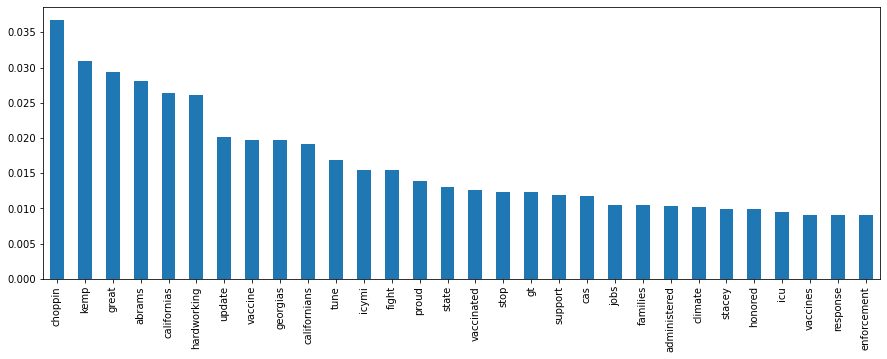

In [22]:
# viewing feature importance of tweets from briankempga and gavinnewsom
pd.Series(rf.feature_importances_, index=vec.get_feature_names()).\
    sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,5));

### XGB

In [23]:
xgb = XGBClassifier(max_depth=12, n_estimators=200)
xgb.fit(X_train, 1*(y_train == 'briankempga'))
y_pred = xgb.predict(X_test)
y_pred = ['gavinnewsom' if x == 0 else 'briankempga' for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 briankempga       0.89      0.84      0.86       979
 gavinnewsom       0.85      0.89      0.87       970

    accuracy                           0.87      1949
   macro avg       0.87      0.87      0.87      1949
weighted avg       0.87      0.87      0.87      1949



### Logistic Regression 

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy Score - ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score -  0.9025141097998974
              precision    recall  f1-score   support

 briankempga       0.93      0.88      0.90       979
 gavinnewsom       0.88      0.93      0.90       970

    accuracy                           0.90      1949
   macro avg       0.90      0.90      0.90      1949
weighted avg       0.90      0.90      0.90      1949



### Naive Bayes Model

In [69]:
# Vectorize text reviews to numbers
nb = GaussianNB()
nb.fit(X_train.todense(), y_train)
y_pred = nb.predict(X_test.todense())
print('Accuracy Score - ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score -  0.7860441251924064
              precision    recall  f1-score   support

 briankempga       0.75      0.87      0.80       979
 gavinnewsom       0.84      0.70      0.77       970

    accuracy                           0.79      1949
   macro avg       0.79      0.79      0.78      1949
weighted avg       0.79      0.79      0.78      1949



### Linear SVC Model

In [70]:
# HyperTuning Parameters with Validation Set
lsvc = LinearSVC(verbose=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print('Accuracy Score - ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score -  0.9086711133914828
              precision    recall  f1-score   support

 briankempga       0.92      0.90      0.91       979
 gavinnewsom       0.90      0.92      0.91       970

    accuracy                           0.91      1949
   macro avg       0.91      0.91      0.91      1949
weighted avg       0.91      0.91      0.91      1949



### Support Vector Machines

In [71]:
svm = svm.SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy Score -', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score - 0.905079527963058
              precision    recall  f1-score   support

 briankempga       0.92      0.89      0.90       979
 gavinnewsom       0.89      0.92      0.91       970

    accuracy                           0.91      1949
   macro avg       0.91      0.91      0.91      1949
weighted avg       0.91      0.91      0.91      1949



### K Nearest Neighbors 

In [72]:
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.587994     0.996701
1    2    0.586455     0.992962
2    3    0.539251     0.587420
3    4    0.572088     0.762041
4    5    0.544382     0.628326
5    6    0.550539     0.651858
6    7    0.530528     0.579283
7    8    0.531555     0.600616
8    9    0.517701     0.552672
9   10    0.525911     0.566747
10  11    0.516162     0.537057
11  12    0.516162     0.544975
12  13    0.511544     0.525621
13  14    0.513084     0.530680
14  15    0.508979     0.518144
15  16    0.508979     0.522322


In [74]:
# K = 1 has the best score when trying to classify the test set, however, it is clear that it is overfitting 
# the training set
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score -', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score - 0.5879938429964084
              precision    recall  f1-score   support

 briankempga       0.92      0.20      0.32       979
 gavinnewsom       0.55      0.98      0.70       970

    accuracy                           0.59      1949
   macro avg       0.74      0.59      0.51      1949
weighted avg       0.74      0.59      0.51      1949



### Topic Modeling

### LDA 

In [76]:
# defining the function to 
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))


In [77]:
vec = TfidfVectorizer(stop_words=mystopword)
vec.fit(df['clean_text'])
tfidf_vals = vec.transform(df['clean_text'])

KeyError: 'clean_text'

In [60]:
lda_text_model = LatentDirichletAllocation(n_components=2, random_state=123)
lda_top = lda_text_model.fit_transform(tfidf_vals)

In [61]:
display_topics(lda_text_model, vec.get_feature_names())

NotFittedError: Vocabulary not fitted or provided

In [ ]:
df['topic'] = lda_top.argmax(1)
pd.crosstab(df['topic'], df['id'])

In [ ]:
lda_display = pyLDAvis.sklearn.prepare(lda_text_model, tfidf_vals, vec, sort_topics=False)
pyLDAvis.display(lda_display)

### LSA

In [39]:
from sklearn.decomposition import TruncatedSVD
svd_text_model = TruncatedSVD(n_components = 5, random_state=42)
W_svd_text_matrix = svd_text_model.fit_transform(tfidf_vals)
H_svd_text_matrix = svd_text_model.components_

In [40]:
# call display_topics on your model
display_topics(svd_text_model, vec.get_feature_names())


Topic 00
  tune (37.57)
  update (6.17)
  pm (1.74)
  live (1.44)
  tonight (1.18)

Topic 01
  today (0.96)
  governor (0.94)
  state (0.89)
  vote (0.81)
  amp (0.79)

Topic 02
  update (6.78)
  live (5.07)
  watch (5.01)
  response (4.47)
  governor (4.44)

Topic 03
  choppin (6.68)
  lets (2.21)
  update (1.56)
  thanks (1.06)
  watch (1.05)

Topic 04
  vote (16.45)
  election (3.57)
  day (3.10)
  early (2.63)
  kemp (2.36)


### Non-Negative Matrix Factorization Model

In [41]:
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

nmf_text_model = NMF(n_components=5, random_state=314)
W_text_matrix = nmf_text_model.fit_transform(tfidf_vals)
H_text_matrix = nmf_text_model.components_

warnings.filterwarnings("ignore", category= FutureWarning)

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [42]:
display_topics(nmf_text_model, vec.get_feature_names())


Topic 00
  tune (64.32)
  update (6.68)
  tonight (1.93)
  pm (1.49)
  announcement (1.26)

Topic 01
  state (1.22)
  amp (1.08)
  great (0.68)
  new (0.57)
  fight (0.45)

Topic 02
  update (7.64)
  live (6.33)
  governor (6.16)
  watch (6.05)
  response (5.28)

Topic 03
  choppin (16.42)
  lets (5.31)
  thanks (3.83)
  support (3.15)
  strong (2.12)

Topic 04
  vote (8.95)
  election (2.02)
  day (1.90)
  early (1.50)
  kemp (1.45)
